# This is my first idea for going towards the hybrid architecture that I am looking to achieve. So, according to this idea, I am going to check if it works on the MNIST dataset or not.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow

I start with the usual utility cells for this task

In [1]:
# packages used for machine learning
import tensorflow as tf

# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# import pandas for reading the csv files
import pandas as pd

# to plot the images inline
%matplotlib inline

In [2]:
# set the random seed to 3 so that the output is repeatable
np.random.seed(3)

In [3]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [4]:
# check the structure of the project directory
exec_command(['ls', '../..'])

Data
LICENSE
Literature_survey
Models
README.md
Res
Scripts



In [5]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../../Data" # the data path

dataset = "MNIST"

data_files = {
    'train': os.path.join(data_path, dataset, "train.csv"),
    'test' : os.path.join(data_path, dataset, "test.csv")
}

base_model_path = '../../Models'

current_model_path = os.path.join(base_model_path, "IDEA_1")

model_path_name = os.path.join(current_model_path, "Model2_v2")

# constant values:
highest_pixel_value = 255
train_percentage = 95
num_classes = 10
no_of_epochs = 500
batch_size = 64
hidden_neurons = 512

# Let's load in the data:
-------------------------------------------------------------------------------------------------------------------
## and perform some basic preprocessing on it

In [6]:
raw_data = pd.read_csv(data_files['train'])

In [7]:
n_features = len(raw_data.columns) - 1
n_examples = len(raw_data.label)
print n_features, n_examples

784 42000


In [8]:
raw_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
labels = np.array(raw_data['label'])

In [10]:
labels.shape

(42000,)

In [11]:
# extract the data from the remaining raw_data
features = np.ndarray((n_features, n_examples), dtype=np.float32)

count = 0 # initialize from zero
for pixel in raw_data.columns[1:]:
    feature_slice = np.array(raw_data[pixel])
    features[count, :] = feature_slice
    count += 1 # increment count

In [12]:
features.shape

(784, 42000)

In [13]:
# normalize the pixel data by dividing the values by the highest_pixel_value
features = features / highest_pixel_value

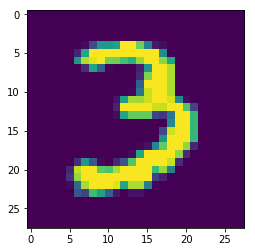

In [14]:
plt.imshow((features[:, 9]).reshape((28, 28)))

# use the function to generate the train_dev split
-------------------------------------------------------------------------------------------------------------------
link -> https://github.com/akanimax/machine-learning-helpers/blob/master/training/data_setup.py

In [15]:
# shuffle the data using a random permutation
perm = np.random.permutation(n_examples)
features = features[:, perm]
labels = labels[perm]

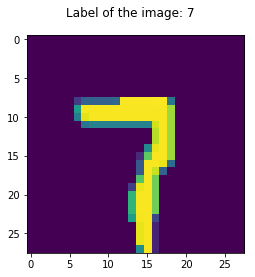

In [16]:
random_index = np.random.randint(n_examples)
random_image = features[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(labels[random_index]))
plt.imshow(random_image)

In [17]:
# function to split the data into train - dev sets:
def split_train_dev(X, Y, train_percentage):
    '''
        function to split the given data into two small datasets (train - dev)
        @param
        X, Y => the data to be split
        (** Make sure the train dimension is the first one)
        train_percentage => the percentage which should be in the training set.
        (**this should be in 100% not decimal)
        @return => train_X, train_Y, test_X, test_Y
    '''
    m_examples = len(X)
    assert train_percentage < 100, "Train percentage cannot be greater than 100! NOOB!"
    partition_point = int((m_examples * (float(train_percentage) / 100)) + 0.5) # 0.5 is added for rounding

    # construct the train_X, train_Y, test_X, test_Y sets:
    train_X = X[: partition_point]; train_Y = Y[: partition_point]
    test_X  = X[partition_point: ]; test_Y  = Y[partition_point: ]

    assert len(train_X) + len(test_X) == m_examples, "Something wrong in X splitting"
    assert len(train_Y) + len(test_Y) == m_examples, "Something wrong in Y splitting"

    # return the constructed sets

    return train_X, train_Y, test_X, test_Y

In [18]:
train_X, train_Y, test_X, test_Y = split_train_dev(features.T, labels, train_percentage)

In [19]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [20]:
train_X = train_X.T; test_X = test_X.T
train_X.shape, test_X.shape

((784, 39900), (784, 2100))

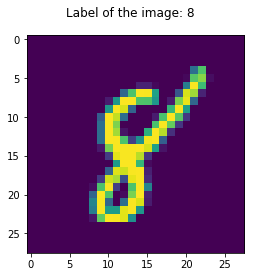

In [21]:
# check by plotting some image
random_index = np.random.randint(train_X.shape[-1])
random_image = train_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(train_Y[random_index]))
plt.imshow(random_image)

# Point to reset from here onwards: 

In [22]:
# defining the Tensorflow graph for this task:
tf.reset_default_graph() # reset the graph here:

In [23]:
# define the placeholders:
tf_input_pixels = tf.placeholder(tf.float32, shape=(n_features, None))
tf_integer_labels = tf.placeholder(tf.int32, shape=(None,))

In [24]:
# image shaped pixels for the input_pixels:
tf_input_images = tf.reshape(tf.transpose(tf_input_pixels), shape=(-1, 28, 28, 1))
input_image_summary = tf.summary.image("input_image", tf_input_images)

In [25]:
# define the one hot encoded version fo the integer_labels
tf_one_hot_encoded_labels = tf.one_hot(tf_integer_labels, depth=num_classes, axis=0)
tf_one_hot_encoded_labels

<tf.Tensor 'one_hot:0' shape=(10, ?) dtype=float32>

In [26]:
# define the layer 0 biases:
lay_0_b = tf.get_variable("layer_0_biases", shape=(n_features, 1), initializer=tf.zeros_initializer())


# layer 1 weights 
lay_1_W = tf.get_variable("layer_1_weights", shape=(hidden_neurons, n_features), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_1_b = tf.get_variable("layer_1_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 2 weights
lay_2_W = tf.get_variable("layer_2_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_2_b = tf.get_variable("layer_2_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 3 weights
lay_3_W = tf.get_variable("layer_3_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_3_b = tf.get_variable("layer_3_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 4 weights
lay_4_W = tf.get_variable("layer_4_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_4_b = tf.get_variable("layer_4_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 5 weights
lay_5_W = tf.get_variable("layer_5_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_5_b = tf.get_variable("layer_5_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 6 weights
lay_6_W = tf.get_variable("layer_6_weights", shape=(num_classes, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_6_b = tf.get_variable("layer_6_biases", shape=(num_classes, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# define the forward computation:

In [27]:
# forward computation:
z1 = tf.matmul(lay_1_W, tf_input_pixels) + lay_1_b
a1 = tf.abs(z1)

z2 = tf.matmul(lay_2_W, a1) + lay_2_b
a2 = tf.abs(z2)

z3 = tf.matmul(lay_3_W, a2) + lay_3_b
a3 = tf.abs(z3) 

z4 = tf.matmul(lay_4_W, a3) + lay_4_b
a4 = tf.abs(z4) 

z5 = tf.matmul(lay_5_W, a4) + lay_5_b
a5 = tf.abs(z5) 

z6 = tf.matmul(lay_6_W, a5) + lay_6_b
a6 = tf.abs(z6)

# define the backward computation:

In [28]:
# in the backward computations, there are no actiavtion functions
y_in_back = a6

a1_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), y_in_back) + lay_5_b)
a2_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), a1_back) + lay_4_b)
a3_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), a2_back) + lay_3_b)
a4_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), a3_back) + lay_2_b)
a5_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), a4_back) + lay_1_b)
a6_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), a5_back) + lay_0_b)

In [29]:
y_in_back

<tf.Tensor 'Abs_5:0' shape=(10, ?) dtype=float32>

In [30]:
in_back_vector = tf.placeholder(tf.float32, shape=(num_classes, None))

In [31]:
# computations for obtaining predictions: 
pred1_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), in_back_vector) + lay_5_b)
pred2_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), pred1_back) + lay_4_b)
pred3_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), pred2_back) + lay_3_b)
pred4_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), pred3_back) + lay_2_b)
pred5_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), pred4_back) + lay_1_b)
pred6_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), pred5_back) + lay_0_b)

# generated digits:
generated_digits = pred6_back

In [32]:
x_out_back = a6_back
x_out_back, tf_input_pixels

(<tf.Tensor 'Abs_11:0' shape=(784, ?) dtype=float32>,
 <tf.Tensor 'Placeholder:0' shape=(784, ?) dtype=float32>)

In [33]:
x_out_back_image = tf.reshape(tf.transpose(x_out_back), shape=(-1, 28, 28, 1))
output_image_summary = tf.summary.image("output_image", x_out_back_image)

In [34]:
y_in_back

<tf.Tensor 'Abs_5:0' shape=(10, ?) dtype=float32>

# Now compute the forward cost

In [35]:
def normalize(x):
    '''
        function to range normalize the given input tensor
        @param 
        x => the input tensor to be range normalized
        @return => range normalized tensor
    '''
    x_max = tf.reduce_sum(x, axis=0)
    # return the range normalized prediction values:
    return (x / x_max)

In [36]:
# forward cost 
fwd_cost = tf.reduce_mean(tf.abs(normalize(y_in_back) - tf_one_hot_encoded_labels))
fwd_cost_summary = tf.summary.scalar("Forward_cost", fwd_cost)

# Now compute the backward cost

In [37]:
# backward cost 
# The backward cost is the mean squared error function
bwd_cost = tf.reduce_mean(tf.abs(x_out_back - tf_input_pixels))
bwd_cost_summary = tf.summary.scalar("Backward_cost", bwd_cost)

# The final cost is the addition of both forward and the backward costs 

In [38]:
cost = fwd_cost + bwd_cost
final_cost_summary = tf.summary.scalar("Final_cost", cost)

In [39]:
# define an optimizer for this task
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
init = tf.global_variables_initializer()
all_summaries = tf.summary.merge_all()

In [40]:
n_train_examples = train_X.shape[-1]

In [41]:
sess = tf.InteractiveSession()

In [ ]:
tensorboard_writer = tf.summary.FileWriter(model_path_name, graph=sess.graph, filename_suffix=".bot")

In [ ]:
sess.run(init)

In [ ]:
# start training the network for num_iterations and using the batch_size
global_step = 30202
for epoch in range(no_of_epochs):
    global_index = 0; costs = [] # start with empty list
    while(global_index < n_train_examples):
        start = global_index; end = start + batch_size
        train_X_minibatch = train_X[:, start: end]
        train_Y_minibatch = train_Y.astype(np.int32)[start: end]

        iteration = global_index / batch_size
        
        # run the computation:
        _, loss = sess.run((optimizer, cost), feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})

        # add the cost to the cost list
        costs.append(loss)

        if(iteration % 100 == 0):
            sums = sess.run(all_summaries, feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})
            
            print "Iteration: " + str(global_step) + " Cost: " + str(loss)

            tensorboard_writer.add_summary(sums, global_step = global_step)
        
        # increment the global index 
        global_index = global_index + batch_size
    
        global_step += 1
        
    # print the average epoch cost:
    print "Average epoch cost: " + str(sum(costs) / len(costs))
        

# Very Important: Save this trained model

In [42]:
model_file_name = os.path.join(model_path_name, model_path_name.split("/")[-1])
model_file_name

'../../Models/IDEA_1/Model2_v2/Model2_v2'

In [43]:
saver = tf.train.Saver()

In [ ]:
saver.save(sess, model_file_name, global_step=global_step)

# Model13 seems to be the most promising till now. It has (Mean absolute difference) function as the forward and the backward costs
-------------------------------------------------------------------------------------------------------------------
# Model2_v2 (currently being used), is same as Model13 but with the softmax function replaced by the range normalizer function for getting a probability distribution

# The following cell shows how the network final activations look like upon passing some of the test images that It has never seen before
-------------------------------------------------------------------------------------------------------------------
# Run the following cell multiple times to see the effect better

In [44]:
saver.restore(sess, tf.train.latest_checkpoint(model_path_name))

INFO:tensorflow:Restoring parameters from ../../Models/IDEA_1/Model2_v2/Model2_v2-113677


[  1.03291810e-01   1.29298717e-01   3.32384911e+01   1.09036222e-01
   1.06722169e-01   4.23101932e-02   8.88368934e-02   7.75362924e-03
   5.20097241e-02   5.65509312e-02]
Predicted label: 2


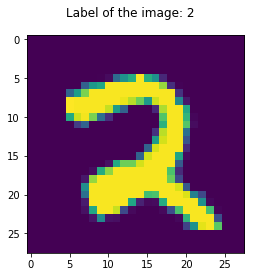

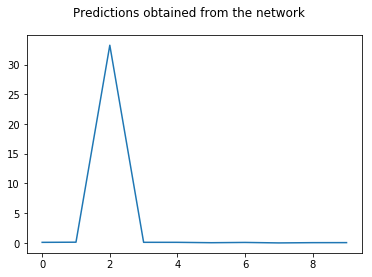

In [45]:
# check by plotting some image
random_index = np.random.randint(test_X.shape[-1])
random_image = test_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(test_Y[random_index]))
plt.imshow(random_image)

# generate the predictions for one random image from the test set.
predictions = np.squeeze(sess.run(y_in_back, feed_dict={tf_input_pixels: test_X[:, random_index].reshape((-1, 1))}))

plt.figure().suptitle("Predictions obtained from the network")
plt.plot(range(10), predictions);
print predictions
print "Predicted label: " + str(np.argmax(predictions))

# Calculate the accuracy of the network on the training and the test dataset

In [46]:
tf_input_pixels, train_X.shape

(<tf.Tensor 'Placeholder:0' shape=(784, ?) dtype=float32>, (784, 39900))

In [47]:
preds = sess.run(y_in_back, feed_dict={tf_input_pixels: train_X})

In [48]:
correct = np.sum(np.argmax(preds, axis=0) == train_Y)
accuracy = (float(correct) / train_X.shape[-1]) * 100
print "Training accuracy: " + str(accuracy)

Training accuracy: 99.8596491228


# Calculate the test accuracy:

In [49]:
test_preds = sess.run(y_in_back, feed_dict={tf_input_pixels: test_X})
test_correct = np.sum(np.argmax(test_preds, axis=0) == test_Y)
test_accuracy = (float(test_correct) / test_X.shape[-1]) * 100
print "Testing accuracy:" + str(test_accuracy)

Testing accuracy:97.4285714286


# Now comes the best part! Can The network generate digits?
-------------------------------------------------------------------------------------------------------------------
# Let's generate some digits by tweaking the learned representation

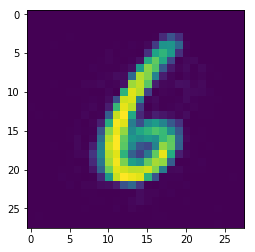

In [50]:
generator_array = np.array([2.42562220e-03,   6.63316175e-02,   5.14896587e-03,   5.55557422e-02,
   8.33549351e-03,   1.06856683e-02,   1.17659550e+01,   1.30331926e-02,
   1.42113212e-02,   1.96716078e-02]).reshape(-1, 1).astype(np.float32)
generator_array.dtype
generated_image = sess.run(generated_digits, feed_dict={in_back_vector: generator_array}).reshape((28, 28))
plt.imshow(generated_image)

# generate representations for different digits by walking along their respective axes

In [59]:
total_frames = 80

In [60]:
all_digits = [] # start with an empty list
for walking_axis in range(num_classes):
    reps = np.zeros(shape=(num_classes, total_frames))
    for cnt in range(total_frames):
        reps[walking_axis, cnt] = cnt
    all_digits.append(reps)

all_digits = np.hstack(all_digits)

In [61]:
all_digits.shape

(10, 800)

In [62]:
# obtain the images for these inputs:
representations, images = sess.run((pred1_back, generated_digits), feed_dict={in_back_vector: all_digits})

In [63]:
all_digits = all_digits.T
print all_digits.shape

(800, 10)


In [64]:
representations = representations.T
print representations.shape

(800, 512)


In [65]:
images = images.T.reshape((-1, 28, 28))
print images.shape

(800, 28, 28)


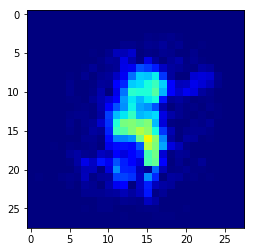

In [79]:
imagelist = images

import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = u'/home/animesh/.linuxbrew/bin/ffmpeg'

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(imagelist[0], cmap=plt.get_cmap('jet'), vmin=0, vmax=1);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imagelist[j])
    # return the artists set
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(images.shape[0]), 
                              interval=50, blit=True)

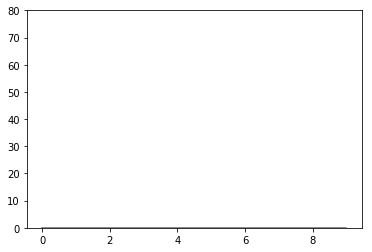

In [80]:
in_list = all_digits

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
plt.ylim((0, 80))
in_plot,  = plt.plot(in_list[0]);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    in_plot.set_ydata(in_list[j])
    # return the artists set
    return [in_plot]
# kick off the animation
in_ani = animation.FuncAnimation(fig, updatefig, frames=range(all_digits.shape[0]), 
                              interval=50, blit=True)

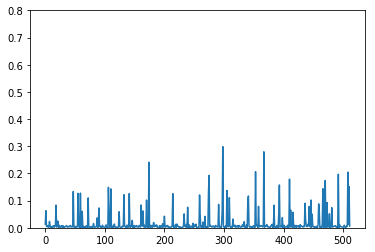

In [81]:
plotlist = representations

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
plt.ylim((0, 0.8))
plot,  = plt.plot(representations[0]);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    plot.set_ydata(representations[j])
    # return the artists set
    return [plot]
# kick off the animation
plot_ani = animation.FuncAnimation(fig, updatefig, frames=range(representations.shape[0]), 
                              interval=50, blit=True)

In [82]:
print(animation.writers.list())

[u'imagemagick_file', u'imagemagick', u'ffmpeg', u'ffmpeg_file']


In [83]:
HTML(in_ani.to_html5_video())

In [84]:
HTML(ani.to_html5_video())

In [85]:
HTML(plot_ani.to_html5_video())

# The above activations' graph visualization proves that the network is not cheating by using half of the representations for encoding and half for decoding. The network has simultaneously stored weights that allows it to perform both the tasks in a unified manner.

# Hell Yeah! That's a victory! We can indeed generate digits using this neural network